In [96]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import numpy as np

In [102]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#importando datasets 
x, y = load_iris(return_X_y=True, as_frame=True)

In [12]:
#considerando apenas a coluna 'pedal width (cm)' e os targets 0 e 1 
x  =x.loc[y.isin([0,1]), ['petal width (cm)']].values 
y = y[y.isin([0,1])].values

In [13]:
#separando dados de treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

Note: you may need to restart the kernel to use updated packages.


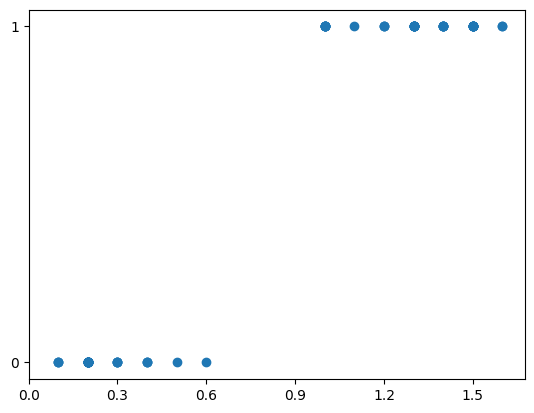

In [ ]:
 
#visualizando os dados

fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
ax.set_xticks([0, 0.3, 0.6, 0.9, 1.2, 1.5])
ax.set_yticks([0, 1])
plt.show()

In [ ]:
#ajustando o modelo de regressão logística
clf = LogisticRegression(random_state=0).fit(x_train.reshape(-1, 1), y_train)


1.0


In [48]:
di = clf.coef_[0][0]

In [50]:
sa = clf.intercept_[0]

In [103]:
#importando numpy e criando uma array de 0 e 2 

valores_x = np.linspace(x_train.min(), x_train.max(), 100)
df_valores_x = pd.DataFrame({'valores_x': valores_x})
df_valores_x.sample(100)

,valores_x
54,0.918182
88,1.433333
57,0.963636
85,1.387879
19,0.387879
36,0.645455
0,0.100000
43,0.751515
17,0.357576
68,1.130303


In [64]:
#calculando valor para acada valores de y
valores_y = expit(di * valores_x + sa)

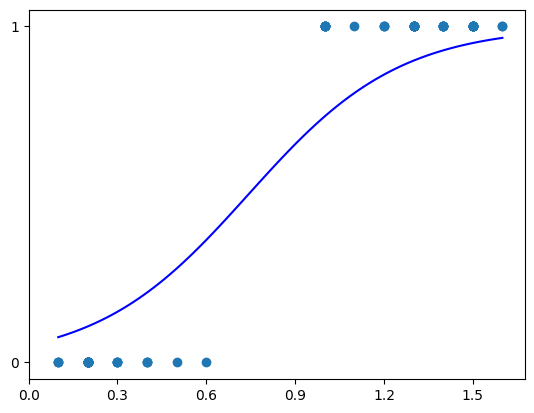

In [114]:
valores_y = expit(di * valores_x + sa)

fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
ax.plot(valores_x, valores_y, color='blue')
ax.set_xticks([0, 0.3, 0.6, 0.9, 1.2, 1.5])
ax.set_yticks([0, 1])
plt.show()

In [ ]:
#exibindo dados de teste 
y_curva = expit(di * x_train + sa)

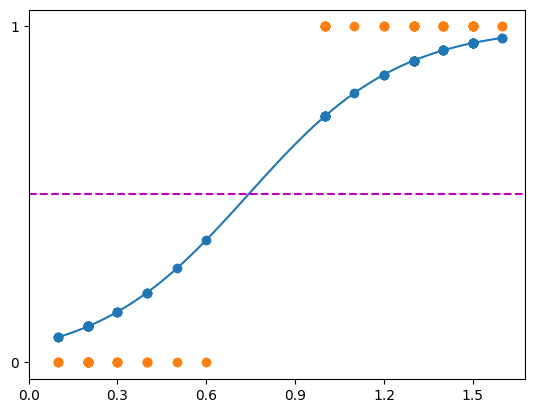

In [113]:
#visualizando os dados
fig, ax = plt.subplots()

ax.scatter(x_train, y_curva)
ax.plot(valores_x, valores_y)
ax.scatter(x_train, y_train)
ax.axhline(y=0.5, c = 'm', linestyle='--')

# ax.plot([0.1, 0.1], [0, 0.07883025], '--g')
# ax.plot([0.2, 0.2], [0, 0.111566521], '--g')
# ax.plot([0.3, 0.3], [0, 0.155601], '--g')
# ax.plot([0.4, 0.4], [0, 0.204813], '--g')
# ax.plot([0.5, 0.5], [0, 0.260130], '--g')
# ax.plot([0.6, 0.6], [0, 0.323433], '--g')
# ax.plot([1.1, 1.1], [0.750260,1], '--g')
# ax.plot([1.2, 1.2], [0.832018,1], '--g')
# ax.plot([1.3, 1.3], [0.880797,1], '--g')
# ax.plot([1.4, 1.4], [0.916827,1], '--g')
# ax.plot([1.5, 1.5], [0.942675,1], '--g')
# ax.plot([1.6, 1.6], [0.952574,1], '--g')


ax.set(yticks=[0,1], xticks=[0.0,0.3,0.6,0.9,1.2,1.5])

plt.show()


In [110]:
expit(di * 0.2 + sa)

np.float64(0.10738904839965287)

In [128]:
#previsao da probabilidade
y_pred = clf.predict_proba(x_test.reshape(-1, 1))[0:5,1]

df_clf = pd.DataFrame({'petal width (cm)': x_test.flatten(), 'target': y_test, 'predicted_proba': clf.predict_proba(x_test.reshape(-1, 1))[:, 1], 'predicted': clf.predict(x_test.reshape(-1, 1))})
df_clf.sample(10)

,petal width (cm),target,predicted_proba,predicted
27,1.3,1,0.898323,1
15,0.2,0,0.107389,0
5,0.2,0,0.107389,0
28,0.1,0,0.075280,0
12,1.2,1,0.856699,1
19,0.4,0,0.208082,0
22,0.4,0,0.208082,0
0,1.6,1,0.966120,1
18,0.1,0,0.075280,0
9,0.2,0,0.107389,0


In [129]:
y_pred 

array([0.96612041, 0.89832271, 0.98419726, 0.15095772, 0.20808199])

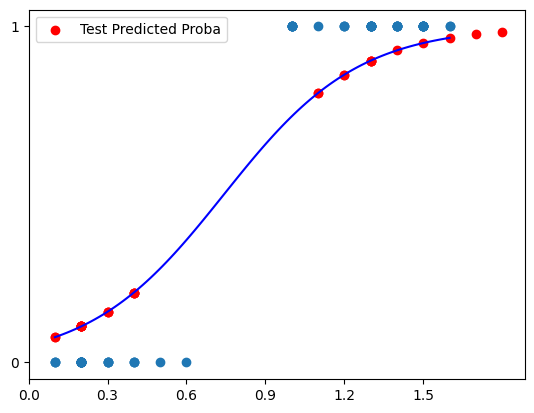

In [132]:
valores_y = expit(di * valores_x + sa)

fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
ax.plot(valores_x, valores_y, color='blue')
ax.scatter(x_test.flatten(), clf.predict_proba(x_test.reshape(-1, 1))[:, 1], color='red', label='Test Predicted Proba')

ax.set_xticks([0, 0.3, 0.6, 0.9, 1.2, 1.5])
ax.set_yticks([0, 1])
ax.legend()
plt.show()

In [133]:
#previsao dos dados de teste
y_pred_valor = clf.predict(x_test.reshape(-1, 1))

In [ ]:
#avaliando o erro 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred_valor)

df_clf = pd.DataFrame({'petal width (cm)': x_test.flatten(), 'target': y_test, 'predicted_proba': clf.predict_proba(x_test.reshape(-1, 1))[:, 1], 'predicted': clf.predict(x_test.reshape(-1, 1))})
df_clf.sample(10)

,petal width (cm),target,predicted_proba,predicted
25,0.4,0,0.208082,0
24,1.1,1,0.801796,1
16,1.4,1,0.928860,1
19,0.4,0,0.208082,0
17,1.7,1,0.976821,1
23,0.2,0,0.107389,0
22,0.4,0,0.208082,0
28,0.1,0,0.075280,0
1,1.3,1,0.898323,1
8,0.2,0,0.107389,0
